In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import hvplot.pandas
from scipy import stats
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')



In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [17]:
data = pd.read_csv(r'C:\Users\yekta\Desktop\2023_nba_player_stats.csv')
data.head(11)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.200,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.100,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.500,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.000,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.600,1959,707,...,742,359,246,52,51,197,3451,46,6,341
5,Anthony Edwards,SG,MIN,21,79,40,39,2841.500,1946,707,...,458,350,259,125,58,186,3311,9,0,97
6,Julius Randle,PF,NYK,28,77,44,33,2737.300,1936,658,...,767,316,216,49,21,233,3324,40,0,170
7,Donovan Mitchell,SG,CLE,26,68,44,24,2432.400,1922,679,...,289,301,180,99,27,168,2918,5,0,338
8,Trae Young,PG,ATL,24,73,38,35,2540.700,1914,597,...,217,741,300,80,9,104,3253,40,0,100
9,Zach LaVine,SG,CHI,28,77,38,39,2767.900,1913,673,...,345,327,194,69,18,159,2885,2,0,18


In [18]:
data.shape

(539, 30)

In [19]:
pd.set_option("display.float","{:.3f}".format)
data.describe()

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,539.000,539.000,539.000,539.000,539.000,539.000,539.000,539.000,539.000,539.000,...,539.000,539.000,539.000,539.000,539.000,539.000,539.000,539.000,539.000,539.000
mean,25.970,48.041,24.019,24.022,1103.618,523.427,191.577,403.006,46.325,56.325,...,198.254,115.545,61.301,33.271,21.241,91.182,1036.939,4.011,0.221,0.000
std,4.316,24.651,14.496,13.446,827.765,498.084,178.351,369.596,10.967,60.917,...,181.820,129.578,58.279,28.337,26.529,66.207,894.082,8.771,1.564,148.224
min,19.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,0.000,-642.000
25%,23.000,30.500,12.000,14.000,329.000,120.500,45.500,93.500,41.650,5.000,...,50.500,22.000,14.500,8.500,5.000,32.000,254.000,0.000,0.000,-70.000
50%,25.000,54.000,25.000,25.000,970.200,374.000,138.000,300.000,45.500,36.000,...,159.000,69.000,44.000,28.000,13.000,86.000,810.000,0.000,0.000,-7.000
75%,29.000,68.000,36.000,34.000,1845.900,769.500,283.500,598.500,50.600,92.000,...,286.000,162.500,92.500,51.000,28.000,140.000,1646.000,3.000,0.000,57.000
max,42.000,83.000,57.000,60.000,2963.200,2225.000,728.000,1559.000,100.000,301.000,...,973.000,741.000,300.000,128.000,193.000,279.000,3842.000,65.000,29.000,640.000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [21]:
#Checking Missing Values
data.isna().sum()

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64

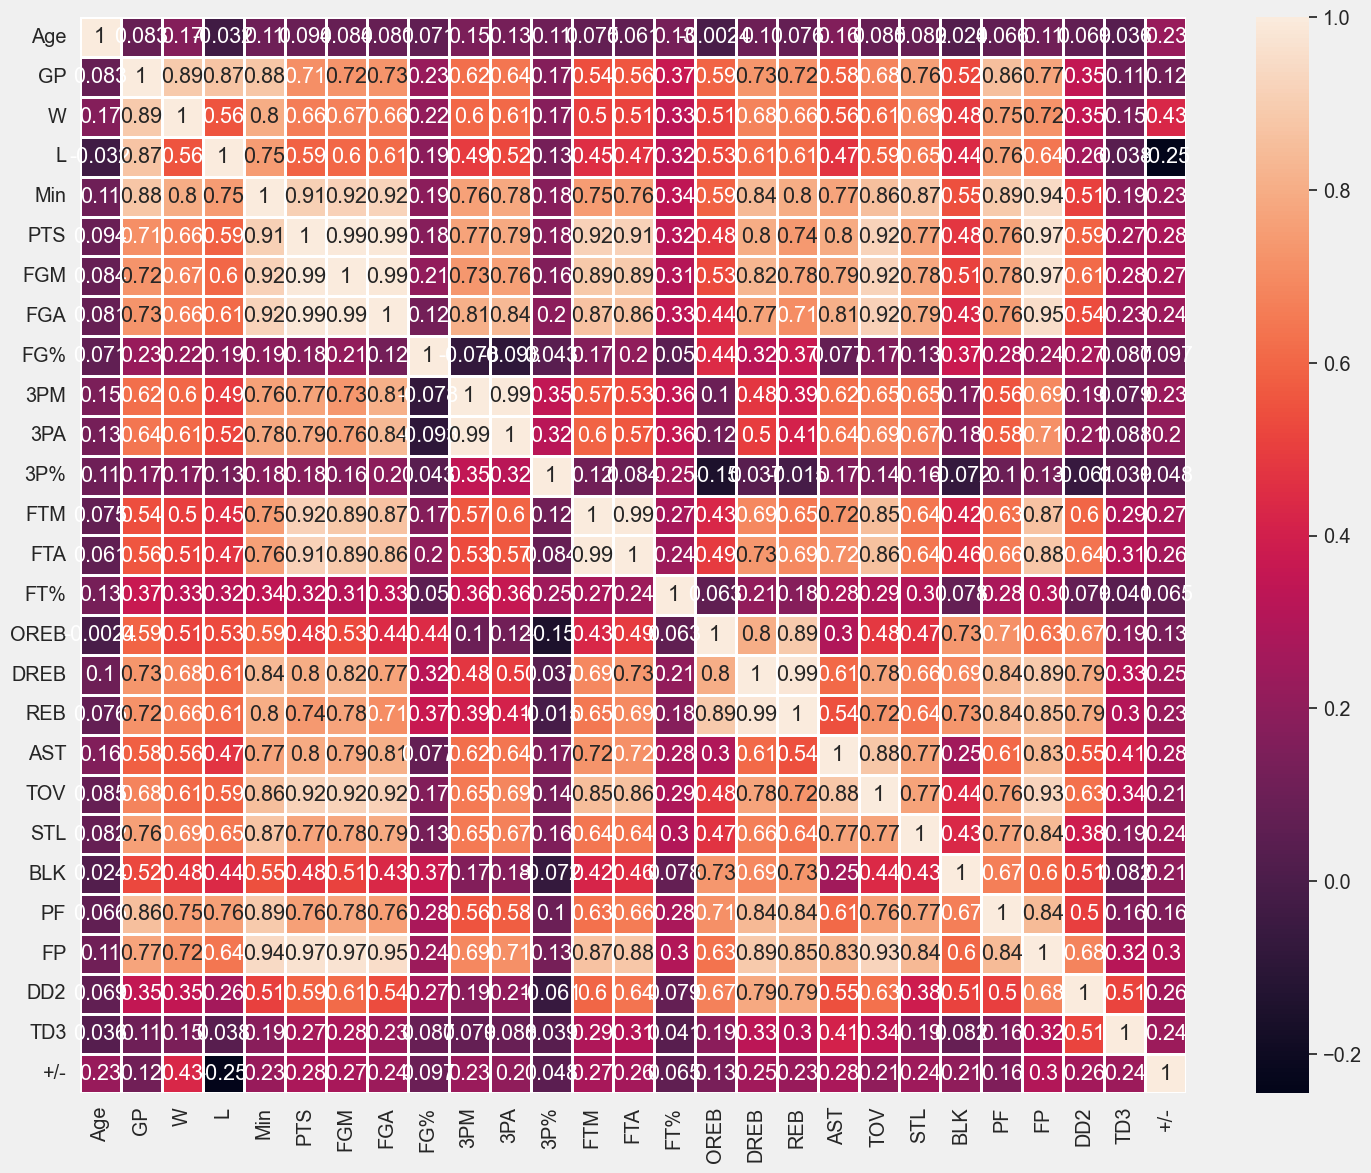

In [22]:
plt.figure(figsize=(15,12))
sns.set_context('notebook',font_scale=1.3)
sns.heatmap(data.corr(),annot=True,linewidth=1)
plt.tight_layout()

In [23]:
categor_val =[]
cotin_val = []
for column in data.columns:
    print("---------------------------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <=10:
        categor_val.append(column)
    else:
        cotin_val.append(column)

---------------------------------------
PName : ['Jayson Tatum' 'Joel Embiid' 'Luka Doncic' 'Shai Gilgeous-Alexander'
 'Giannis Antetokounmpo' 'Anthony Edwards' 'Julius Randle'
 'Donovan Mitchell' 'Trae Young' 'Zach LaVine' 'Damian Lillard'
 "De'Aaron Fox" 'DeMar DeRozan' 'Jaylen Brown' 'Pascal Siakam'
 'Lauri Markkanen' 'Nikola Jokic' 'Jalen Green' 'Jordan Poole'
 'Mikal Bridges' 'Stephen Curry' 'Jalen Brunson' 'Kyrie Irving'
 'Ja Morant' 'LeBron James' 'CJ McCollum' 'Bam Adebayo' 'Dejounte Murray'
 'Domantas Sabonis' 'Klay Thompson' 'Kristaps Porzingis' 'Darius Garland'
 'Franz Wagner' 'Devin Booker' 'Jimmy Butler' 'Anthony Davis'
 'Nikola Vucevic' 'Paolo Banchero' 'RJ Barrett' 'Keldon Johnson'
 'Spencer Dinwiddie' 'Kevin Durant' 'Kyle Kuzma' 'Tyler Herro'
 'Buddy Hield' 'Fred VanVleet' 'Paul George' 'Terry Rozier'
 'Anfernee Simons' 'Bennedict Mathurin' 'Jamal Murray' 'Jerami Grant'
 'Jrue Holiday' 'Evan Mobley' 'Bojan Bogdanovic' 'Jordan Clarkson'
 "D'Angelo Russell" 'Josh Giddey' 